# Principle Component Analysis

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
%matplotlib inline
plt.style.use('seaborn')

In [2]:
import numpy as np
import sklearn
import matplotlib
import pandas as pd
import sys
libraries = (('Matplotlib', matplotlib), ('Numpy', np), ('Pandas', pd))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.6.2 |Anaconda custom (64-bit)| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] 

Matplotlib Version: 2.0.2
Numpy Version: 1.12.1
Pandas Version: 0.20.3


In [3]:
import numpy as np
import pandas as pd

class pca:
    
    def __init__(self, n_components=None):
        """
        PCA is a form of dimensionality reduction that relies
        on computing the covariance matrix, then redrawing the
        axes along the vectors of highest correlation. To do that
        we'll use the eigenvecors and eigenvalues of the covariance
        matrix. We'll draw as many axes as n_components.
        ---
        KWargs:
        n_components: how many components to have after dim. 
        reduction (int)
        """
        self.n_components = n_components
        
    def fit(self, X):
        """
        After getting the covariance matrix, calculates
        the eigenvectors and values. The eigenvectors lie
        along the line of highest correlation, and we'll use
        the strongest "n_components" number of axes. The 
        strength is determined by the eigenvalues, which
        are also used to measure the explained variance.
        ---
        Input: X, data matrix (dataframe, array, list of lists)
        """
        X = self.convert_to_array(X)
        
        self.covariance_matrix = self.get_covariance_matrix(X)
        self.get_eigenvalues_and_eigenvectors(self.covariance_matrix)
        
        indices = np.argsort(self._eigenvalues) # smallest to largest
        indices = np.flip(indices, axis=0) # largest to smallest
        self.ranked_eigenvalues = self._eigenvalues[indices]
        self.ranked_eigenvectors = self._eigenvectors[:,indices]
        self.explained_variance = self.ranked_eigenvalues/np.sum(self.ranked_eigenvalues)
        
        if self.n_components:
            self.ranked_eigenvalues = self.ranked_eigenvalues[:self.n_components]
            self.ranked_eigenvectors = self.ranked_eigenvectors[:self.n_components]
            self.explained_variance = self.explained_variance[:self.n_components]
        
        
    def get_covariance_matrix(self, X):
        """
        Computes the covariance matrix by removing the means and 
        multiplying the transpose of the data matrix with itself.
        """
        column_averages = np.mean(X, axis=0)
        demeaned_matrix = X - column_averages
        return np.dot(demeaned_matrix.T, demeaned_matrix)/(X.shape[0] - 1)
    
    def get_eigenvalues_and_eigenvectors(self, cov_mat):
        """
        Use the built in eigen extractor from numpy.
        Based on LAPACK eigen solver.
        """
        self._eigenvalues, self._eigenvectors = np.linalg.eigh(cov_mat)
        
    def transform(self, X):
        """
        Converts the new data into the lower dimensional 
        space. This is done by projecting the data along
        the eigenvectors that were created when fitting
        to the original data. 
        ---
        Input: X, data matrix (dataframe, array, list of lists)
        """
        X = self.convert_to_array(X)
        column_averages = np.mean(X, axis=0)
        demeaned_matrix = X - column_averages
        return np.dot(demeaned_matrix, self.ranked_eigenvectors.T)
    
    def fit_transform(self, X):
        """
        Fits and Transforms the data returning the
        representation of the training data in the
        lower dimensional space.
        """
        self.fit(X)
        return self.transform(X)
    
    def pandas_to_numpy(self, x):
        """
        Checks if the input is a Dataframe or series, converts to numpy matrix for
        calculation purposes.
        ---
        Input: X (array, dataframe, or series)
        Output: X (array)
        """
        if type(x) == type(pd.DataFrame()) or type(x) == type(pd.Series()):
            return x.as_matrix()
        if type(x) == type(np.array([1,2])):
            return x
        return np.array(x) 
    
    def handle_1d_data(self,x):
        """
        Converts 1 dimensional data into a series of rows with 1 columns
        instead of 1 row with many columns.
        """
        if x.ndim == 1:
            x = x.reshape(-1,1)
        return x
    
    def convert_to_array(self, x):
        """
        Takes in an input and converts it to a numpy array
        and then checks if it needs to be reshaped for us
        to use it properly
        """
        x = self.pandas_to_numpy(x)
        x = self.handle_1d_data(x)
        return x

# Simple dataset to make sure it's working like SkLearn

In [4]:
from sklearn.datasets import load_iris

X = load_iris().data
dr = pca(n_components=4)
dr.fit(X)

In [5]:
dr.ranked_eigenvectors.T

array([[-0.36158968,  0.08226889, -0.85657211, -0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647],
       [ 0.58099728, -0.59641809, -0.07252408, -0.54906091],
       [ 0.31725455, -0.32409435, -0.47971899,  0.75112056]])

In [6]:
dr.transform(X)[:10]

array([[-1.12561201,  1.9947122 ,  1.20846582,  0.77835417],
       [-1.38156402,  1.61340224,  1.46766394,  0.88747619],
       [-1.23603783,  1.80253274,  1.61107729,  0.99920977],
       [-1.1493334 ,  1.602051  ,  1.69980642,  0.93275263],
       [-1.02379905,  2.05945655,  1.27654629,  0.80676791],
       [-0.73372287,  2.06753352,  0.7634862 ,  0.62632424],
       [-0.97874571,  1.84819708,  1.60635671,  1.04035883],
       [-1.0970073 ,  1.85387226,  1.30444736,  0.76680312],
       [-1.26642317,  1.49929655,  1.91352673,  1.0743688 ],
       [-1.28953575,  1.6591411 ,  1.49080669,  0.74998739]])

In [7]:
dr.explained_variance

array([ 0.92461621,  0.05301557,  0.01718514,  0.00518309])

In [9]:
from sklearn.decomposition import PCA
skPCA = PCA(n_components=4)
skPCA.fit(X)
skPCA.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647],
       [-0.58099728,  0.59641809,  0.07252408,  0.54906091],
       [ 0.31725455, -0.32409435, -0.47971899,  0.75112056]])

In [10]:
skPCA.transform(X)[:10]

array([[ -2.68420713e+00,   3.26607315e-01,  -2.15118370e-02,
          1.00615724e-03],
       [ -2.71539062e+00,  -1.69556848e-01,  -2.03521425e-01,
          9.96024240e-02],
       [ -2.88981954e+00,  -1.37345610e-01,   2.47092410e-02,
          1.93045428e-02],
       [ -2.74643720e+00,  -3.11124316e-01,   3.76719753e-02,
         -7.59552741e-02],
       [ -2.72859298e+00,   3.33924564e-01,   9.62296998e-02,
         -6.31287327e-02],
       [ -2.27989736e+00,   7.47782713e-01,   1.74325619e-01,
         -2.71468037e-02],
       [ -2.82089068e+00,  -8.21045110e-02,   2.64251085e-01,
         -5.00996251e-02],
       [ -2.62648199e+00,   1.70405349e-01,  -1.58015103e-02,
         -4.62817610e-02],
       [ -2.88795857e+00,  -5.70798026e-01,   2.73354061e-02,
         -2.66154143e-02],
       [ -2.67384469e+00,  -1.06691704e-01,  -1.91533300e-01,
         -5.58909660e-02]])

In [11]:
skPCA.explained_variance_ratio_

array([ 0.92461621,  0.05301557,  0.01718514,  0.00518309])

# Converting Iris to 2D for plotting

In [12]:
pc = pca(n_components=2)
X_reduced = pc.fit_transform(X)

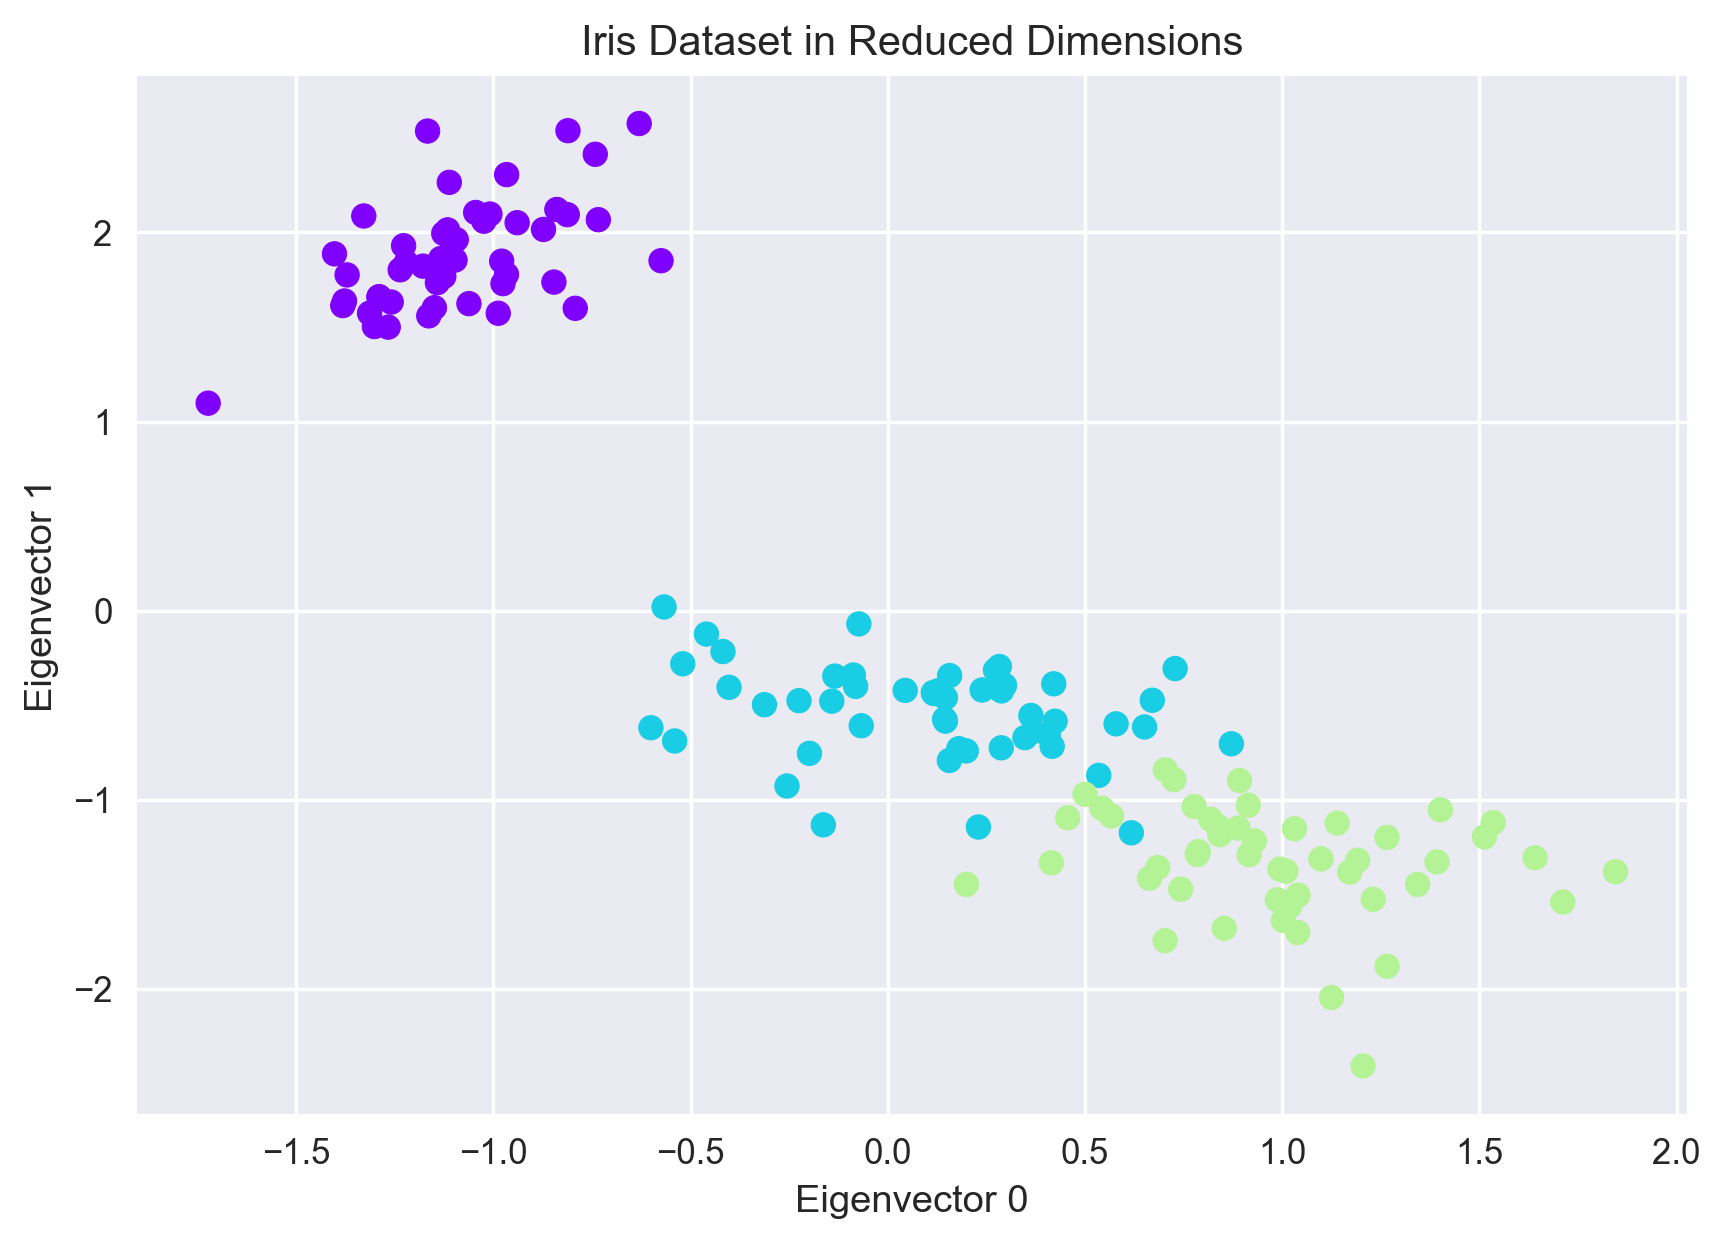

In [13]:
plt.figure(dpi=250)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=plt.cm.rainbow(0.3*load_iris().target))
plt.title("Iris Dataset in Reduced Dimensions")
plt.xlabel("Eigenvector 0")
plt.ylabel("Eigenvector 1");